In [1]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import time
from pandasai import SmartDataframe
from pandasai.llm.openai import OpenAI

In [2]:
# Pandas'a özel parametreler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)
pd.set_option('display.width', 500)

In [3]:
df = pd.read_csv('MTA_Subway.csv')

C:\Users\ahmet\AppData\Local\Temp\ipykernel_6072\2522875168.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('MTA_Subway.csv')


In [4]:
df.dtypes

transit_timestamp      object
station_complex_id     object
station_complex        object
borough                object
routes                 object
payment_method         object
ridership               int64
transfers               int64
latitude              float64
longitude             float64
Georeference           object
itsuid                 object
dtype: object

In [5]:
df.columns

Index(['transit_timestamp', 'station_complex_id', 'station_complex', 'borough', 'routes', 'payment_method', 'ridership', 'transfers', 'latitude', 'longitude', 'Georeference', 'itsuid'], dtype='object')

In [6]:
df.head()

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid
0,03/27/2022 06:00:00 AM,H007,1 Av (L),M,L,omny,12,0,40.731,-73.982,POINT (-73.98162841796875 40.730953216552734),2022-03-27T06:00:00H0071 Av (L)MLomny
1,06/05/2022 02:00:00 AM,H007,1 Av (L),M,L,omny,93,0,40.731,-73.982,POINT (-73.98162841796875 40.730953216552734),2022-06-05T02:00:00H0071 Av (L)MLomny
2,06/13/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,3,0,40.731,-73.982,POINT (-73.98162841796875 40.730953216552734),2023-06-13T03:00:00H0071 Av (L)MLomny
3,07/28/2023 05:00:00 AM,H007,1 Av (L),M,L,omny,31,0,40.731,-73.982,POINT (-73.98162841796875 40.730953216552734),2023-07-28T05:00:00H0071 Av (L)MLomny
4,08/08/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,3,0,40.731,-73.982,POINT (-73.98162841796875 40.730953216552734),2023-08-08T03:00:00H0071 Av (L)MLomny


In [7]:
df = df.drop(columns=['station_complex_id', 'routes', 'payment_method', 'transfers', 'Georeference','itsuid'])

In [8]:
df['station_complex'] = df['station_complex'].str.replace(r' \(.*\)', '', regex=True)

In [9]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [10]:
df['borough'].replace({'M': 'Manhattan', 'Q': 'Queens', 'BX': 'Bronx', 'BK': 'Brooklyn', 'SI': 'Staten Island'}, inplace=True)

In [11]:
# transit_timestamp sütununu datetime türüne çeviriyoruz
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

# Tarih ve saat sütunlarını ayrı ayrı oluşturuyoruz
df['date'] = df['transit_timestamp'].dt.date
df['hour'] = df['transit_timestamp'].dt.time

In [14]:
df['date'] = pd.to_datetime(df['date'])

df['day_of_week'] = df['date'].dt.strftime('%A')

In [15]:
df_grouped2 = df.groupby('day_of_week')['ridership'].sum().reset_index().sort_values(by='ridership', ascending=False)
print(df_grouped2)

  day_of_week  ridership
6   Wednesday  305593582
4    Thursday  302888637
5     Tuesday  297248767
0      Friday  283701101
1      Monday  257292520
2    Saturday  189043914
3      Sunday  150438140


In [16]:
df.head()

,transit_timestamp,station_complex,borough,ridership,latitude,longitude,date,hour,day_of_week
0,2022-03-27 06:00:00,1 Av,Manhattan,12,40.731,-73.982,2022-03-27,06:00:00,Sunday
1,2022-06-05 02:00:00,1 Av,Manhattan,93,40.731,-73.982,2022-06-05,02:00:00,Sunday
2,2023-06-13 03:00:00,1 Av,Manhattan,3,40.731,-73.982,2023-06-13,03:00:00,Tuesday
3,2023-07-28 05:00:00,1 Av,Manhattan,31,40.731,-73.982,2023-07-28,05:00:00,Friday
4,2023-08-08 03:00:00,1 Av,Manhattan,3,40.731,-73.982,2023-08-08,03:00:00,Tuesday


In [17]:
excluded_columns = ["transit_timestamp", "ridership", "hour", "day_of_week"]
unique_value_counts = {column : df[column].nunique() for column in df.columns if column not in excluded_columns}
print(unique_value_counts)

{'station_complex': 341, 'borough': 5, 'latitude': 424, 'longitude': 424, 'date': 602}


In [18]:
df.shape

(11665628, 9)

In [19]:
df.nunique()

transit_timestamp    14446
station_complex        341
borough                  5
ridership             8039
latitude               424
longitude              424
date                   602
hour                    24
day_of_week              7
dtype: int64

In [20]:
df.isna().sum()

transit_timestamp    0
station_complex      0
borough              0
ridership            0
latitude             0
longitude            0
date                 0
hour                 0
day_of_week          0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665628 entries, 0 to 11665627
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   transit_timestamp  datetime64[ns]
 1   station_complex    object        
 2   borough            object        
 3   ridership          int64         
 4   latitude           float64       
 5   longitude          float64       
 6   date               datetime64[ns]
 7   hour               object        
 8   day_of_week        object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(4)
memory usage: 801.0+ MB


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ridership,1.167e+07,153.117,334.666,1.000,16.000,57.000,160.000,14179.000
latitude,1.167e+07,40.731,0.079,40.576,40.675,40.720,40.792,40.903
longitude,1.167e+07,-73.934,0.057,-74.075,-73.980,-73.944,-73.898,-73.755


In [23]:
df_grouped2 = df.groupby('day_of_week')['ridership'].sum().reset_index().sort_values(by='ridership', ascending=False)
print(df_grouped2)

  day_of_week  ridership
6   Wednesday  305593582
4    Thursday  302888637
5     Tuesday  297248767
0      Friday  283701101
1      Monday  257292520
2    Saturday  189043914
3      Sunday  150438140


In [24]:
df_grouped = df.groupby('hour')['ridership'].sum().reset_index().sort_values(by='ridership', ascending=False)

print(df_grouped)

        hour  ridership
17  17:00:00  167672337
16  16:00:00  146793029
8   08:00:00  143089985
18  18:00:00  131834001
15  15:00:00  129912032
7   07:00:00  120634412
14  14:00:00  107495682
9   09:00:00   98234728
13  13:00:00   91027550
19  19:00:00   88836086
12  12:00:00   81666124
10  10:00:00   76954824
11  11:00:00   75230141
20  20:00:00   65321423
6   06:00:00   65112116
21  21:00:00   53075974
22  22:00:00   45087575
23  23:00:00   29709747
5   05:00:00   29253912
0   00:00:00   15770817
4   04:00:00    8688256
1   01:00:00    6926024
2   02:00:00    4116508
3   03:00:00    3763378


In [38]:
# Verileri belirli saatlere göre filtreleyelim
target_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
target_hours = [time(16, 0), time(17, 0), time(18, 0)]
filtered_df = df[df['hour'].isin(target_hours) & df['day_of_week'].isin(target_days)]

# Gruplama ve ridership toplamları
grouped_df = filtered_df.groupby('station_complex')['ridership'].mean().reset_index()

# Azalan sırada sıralama
sorted_df = grouped_df.sort_values(by='ridership', ascending=False)

# İlk 10 veriyi gösterme
top_10_stations = sorted_df.head(10)

# Sonucu yazdırma
print(top_10_stations)


                  station_complex  ridership
318                Times Sq-42 St   7246.377
214           Grand Central-42 St   5058.573
58                34 St-Herald Sq   3696.219
14                 14 St-Union Sq   3107.927
69   47-50 Sts-Rockefeller Center   2851.913
80          59 St-Columbus Circle   2472.477
248            Lexington Av-53 St   2447.297
247                  Lexington Av   2174.654
209                     Fulton St   1751.744
60             34 St-Penn Station   1731.608


In [40]:
filtered_data1 = df[(df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['hour'].isin([time(16, 0), time(17, 0), time(18, 0)]))]


grouped_data = filtered_data.groupby('station_complex')['ridership'].describe()


sorted_data = grouped_data.sort_values(by='mean', ascending=False)

top_10_stations_16_18_ = sorted_data.head(10)

print(top_10_stations_16_18_)

                               count      mean       std     min      25%     50%      75%      max
station_complex                                                                                    
Times Sq-42 St                2556.0  7246.377  2237.620  1164.0  5738.75  7215.5  8629.75  14179.0
Grand Central-42 St           2556.0  5058.573  1839.661   599.0  3953.75  4771.5  6205.50  12486.0
34 St-Herald Sq               2556.0  3696.219  1067.578   657.0  2962.00  3714.5  4442.25   6494.0
14 St-Union Sq                2556.0  3107.927   763.785   432.0  2620.00  3128.0  3705.25   5321.0
47-50 Sts-Rockefeller Center  2556.0  2851.913  1172.796   202.0  2039.50  2685.5  3613.25   6547.0
59 St-Columbus Circle         2556.0  2472.477   711.149   342.0  1969.75  2440.0  3010.00   4342.0
Lexington Av-53 St            2556.0  2447.297   896.157   224.0  1835.00  2366.0  3002.25   5124.0
Lexington Av                  2556.0  2174.654   644.583   198.0  1747.00  2196.0  2615.25   4483.0


In [43]:
# Gruplanmış verileri alın
grouped_data = filtered_data1.groupby('station_complex')['ridership'].mean().reset_index()

# En yüksek 10 istasyonu seçin
top_10_stations_16_18 = grouped_data.nlargest(10, 'ridership')

# Sadece station_complex_id değerlerini alın
station_ids = top_10_stations_16_18['station_complex'].tolist()

# Station ID'leri yazdırın
print("Top 10 Station IDs:")
for station_id in station_ids:
    print(station_id)


Top 10 Station IDs:
Times Sq-42 St
Grand Central-42 St
34 St-Herald Sq
14 St-Union Sq
47-50 Sts-Rockefeller Center
59 St-Columbus Circle
Lexington Av-53 St
Lexington Av
Fulton St
34 St-Penn Station


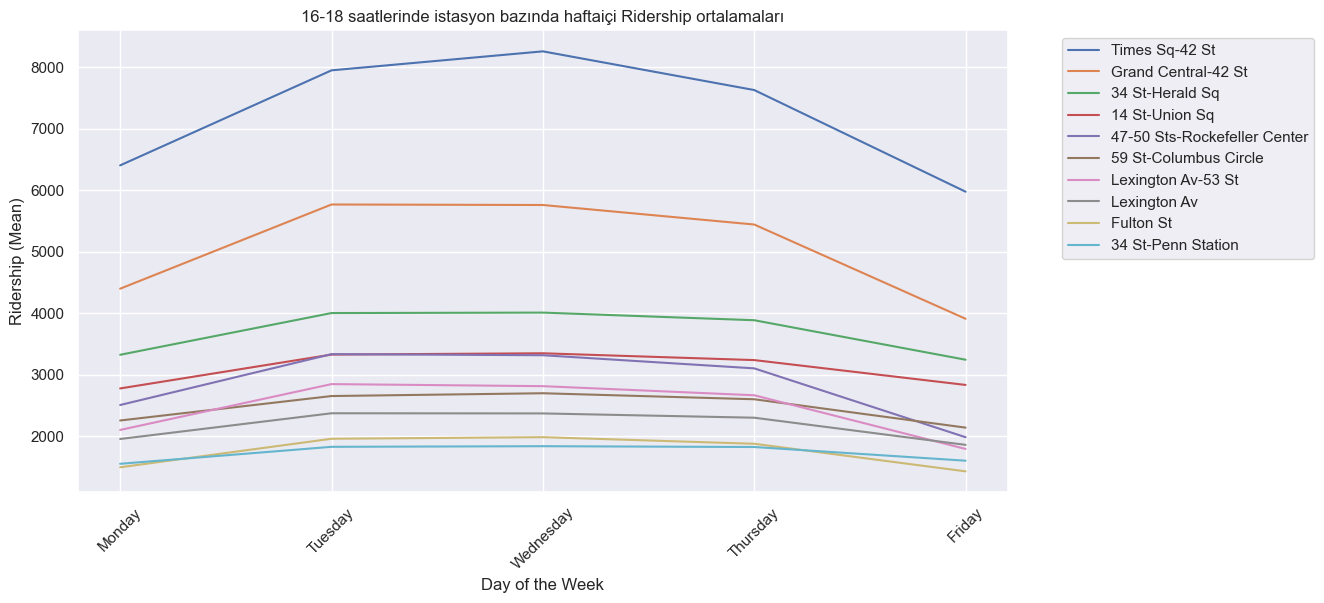

In [55]:
stations = ["Times Sq-42 St", "Grand Central-42 St", "34 St-Herald Sq", "14 St-Union Sq", "47-50 Sts-Rockefeller Center", "59 St-Columbus Circle", "Lexington Av-53 St", "Lexington Av", "Fulton St", "34 St-Penn Station"]


grouped_data = filtered_data1.groupby(['station_complex', 'day_of_week'])['ridership'].mean().reset_index()


day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


grouped_data['day_of_week'] = pd.Categorical(grouped_data['day_of_week'], categories=day_order, ordered=True)
grouped_data = grouped_data.sort_values('day_of_week')


sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))


for station in stations:
    station_data = grouped_data[grouped_data['station_complex'] == station]
    sns.lineplot(data=station_data, x='day_of_week', y='ridership', label=station)

plt.title('16-18 saatlerinde istasyon bazında haftaiçi Ridership ortalamaları')
plt.xlabel('Day of the Week')
plt.ylabel('Ridership (Mean)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


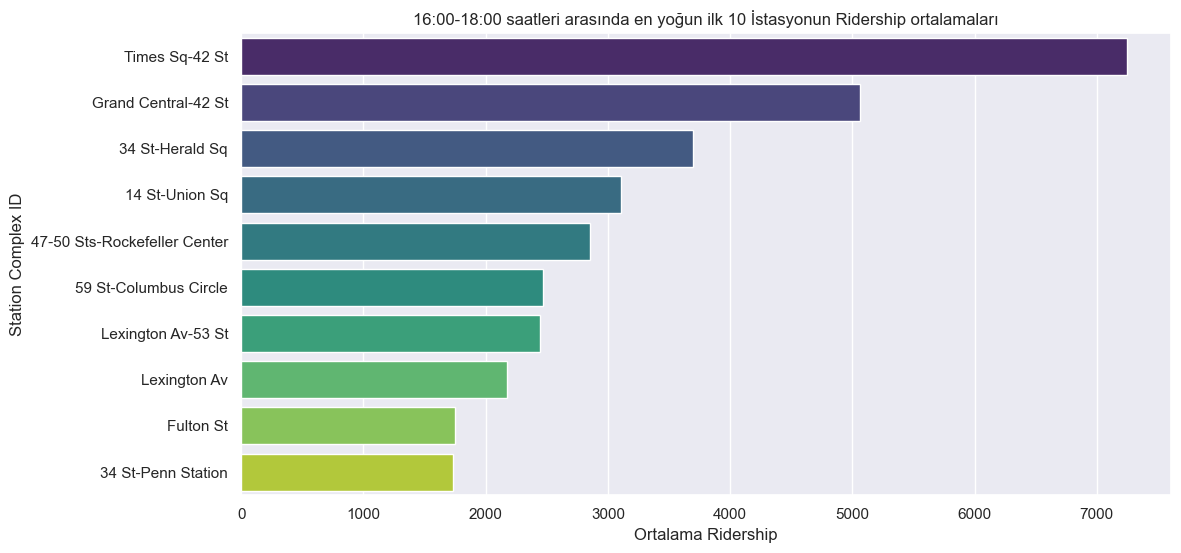

In [46]:
plt.figure(figsize=(12, 6))

# Verileri çubuk grafik olarak çizdir
sns.barplot(x='ridership', y='station_complex', data=top_10_stations_16_18, palette='viridis')

# Eksen etiketlerini ve başlığı ekle
plt.xlabel('Ortalama Ridership')
plt.ylabel('Station Complex ID')
plt.title('16:00-18:00 saatleri arasında en yoğun ilk 10 İstasyonun Ridership ortalamaları')

# Grafik göster
plt.show()

In [59]:
filtered_data2 = df[(df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['hour'].isin([time(7, 0), time(8, 0), time(9, 0)]))]
grouped_data = filtered_data2.groupby('station_complex')['ridership'].sum().reset_index()
sorted_data = grouped_data.sort_values(by='ridership', ascending=False)


top_10_stations_7_9 = sorted_data.reset_index().head(10)
# Sonucu göster
print(top_10_stations_7_9)

   index      station_complex  ridership
0     60   34 St-Penn Station   11283544
1    318       Times Sq-42 St   10739678
2    101                86 St    7394539
3    214  Grand Central-42 St    6670113
4    105                96 St    5385674
5    200     Flushing-Main St    5086708
6     90          74-Broadway    4713291
7      9               125 St    4288841
8     89                72 St    3967179
9     45                23 St    3909417


In [65]:
filtered_data2 = df[(df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])) & (df['hour'].isin([time(7, 0), time(8, 0), time(9, 0)]))]


grouped_data2 = filtered_data2.groupby('station_complex')['ridership'].describe()


sorted_data = grouped_data.sort_values(by='mean', ascending=False)

top_10_stations_7_9_ = sorted_data.head(10)

print(top_10_stations_7_9_)

                           count      mean       std    min      25%     50%      75%     max
station_complex                                                                              
Times Sq-42 St            2556.0  4201.752  1431.779  300.0  3154.75  4302.0  5345.25  7544.0
Grand Central-42 St       2556.0  2609.590  1124.064  123.0  1868.75  2525.5  3235.25  7477.0
34 St-Penn Station        5108.0  2208.995   934.174    1.0  1521.75  2105.0  2860.50  5647.0
Flushing-Main St          2551.0  1994.005  1116.617    1.0   992.50  1782.0  3102.50  4206.0
74-Broadway               2556.0  1844.011   985.914  198.0   971.00  1720.5  2671.25  4207.0
34 St-Herald Sq           2556.0  1528.957   554.589  101.0  1096.00  1574.5  1908.25  2958.0
Junction Blvd             2556.0  1062.299   677.636   87.0   492.50   873.0  1557.75  2894.0
Atlantic Av-Barclays Ctr  2556.0  1038.834   469.657   66.0   681.00   955.0  1414.25  2165.0
14 St-Union Sq            2556.0   977.536   387.798   66.0 

In [66]:
# Gruplanmış verileri alın
grouped_data2 = filtered_data2.groupby('station_complex')['ridership'].mean().reset_index()

# En yüksek 10 istasyonu seçin
top_10_stations_7_9_ = grouped_data2.nlargest(10, 'ridership')

# Sadece station_complex değerlerini alın
station_ids = top_10_stations_7_9_['station_complex'].tolist()

# Station ID'leri yazdırın
print("Top 10 Station :")
for station_id in station_ids:
    print(station_id)

Top 10 Station :
Times Sq-42 St
Grand Central-42 St
34 St-Penn Station
Flushing-Main St
74-Broadway
34 St-Herald Sq
Junction Blvd
Atlantic Av-Barclays Ctr
14 St-Union Sq
Crown Heights-Utica Av


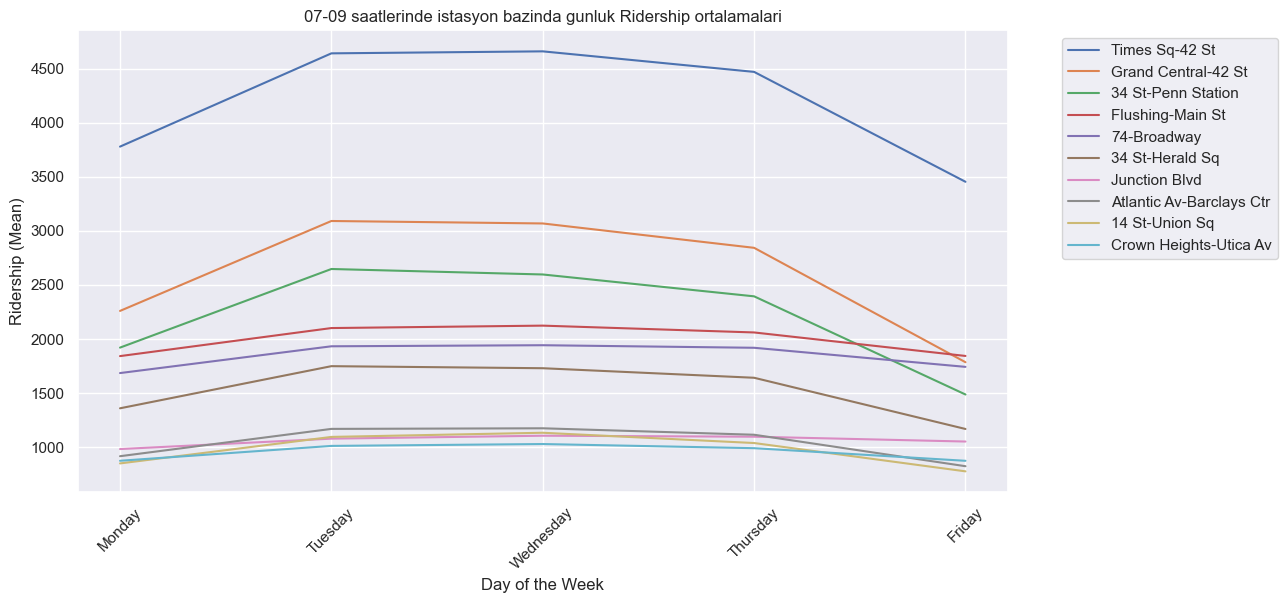

In [68]:

stations = ["Times Sq-42 St", "Grand Central-42 St", "34 St-Penn Station", "Flushing-Main St", "74-Broadway", "34 St-Herald Sq", "Junction Blvd", "Atlantic Av-Barclays Ctr", "14 St-Union Sq", "Crown Heights-Utica Av"]



grouped_data2 = filtered_data2.groupby(['station_complex', 'day_of_week'])['ridership'].mean().reset_index()


day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


grouped_data2['day_of_week'] = pd.Categorical(grouped_data2['day_of_week'], categories=day_order, ordered=True)
grouped_data2 = grouped_data2.sort_values('day_of_week')


sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))


for station in stations:
    station_data = grouped_data2[grouped_data2['station_complex'] == station]
    sns.lineplot(data=station_data, x='day_of_week', y='ridership', label=station)

plt.title('07-09 saatlerinde istasyon bazinda gunluk Ridership ortalamalari')
plt.xlabel('Day of the Week')
plt.ylabel('Ridership (Mean)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#df.to_csv('transformed_mta_data.csv', index=False)